# 数学基础

In [1]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import copy
import pdb
from random import random
%matplotlib inline  

/home/limber/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/limber/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## 线性变换图示

In [2]:
"""准备初始图形"""
num_poits = 250
chunksize = 50
shape = pd.DataFrame({'ind':range(num_poits)})
shape['x'] = shape.ind.apply(lambda x: (x%chunksize)*1.0/chunksize)
shape['y'] = shape.ind.apply(lambda x: (x/chunksize)/(num_poits*1.0/chunksize-1))
shape_re = shape.copy()
shape_re['x'] = shape['y']
shape_re['y'] = shape['x']
shape = shape.append(shape_re)
shape['x'] -= 0.2
shape['y'] -= 0.2

shape.drop('ind', axis=1, inplace=True)

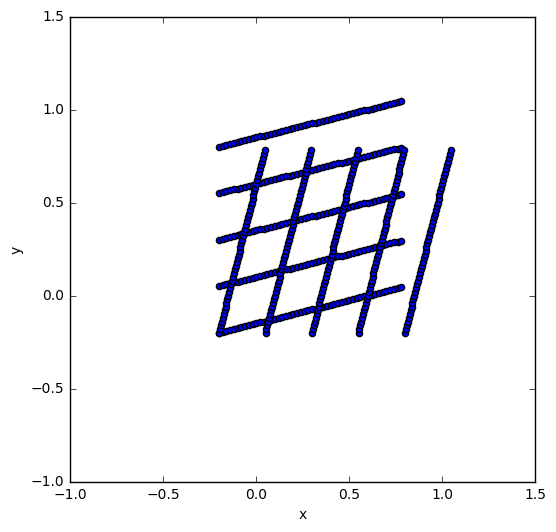

In [21]:
"""初始图形Plot"""
shape.plot(x='x', y='y', figsize=[6,6], kind = 'scatter')
plt.xlim([-1,1.5])
plt.ylim([-1,1.5])
plt.show()

In [4]:
"""线性变换矩阵"""
pi=np.pi
rotation = pd.DataFrame(np.array([[np.cos(pi/4), np.sin(pi/4)],[-np.sin(pi/4), np.cos(pi/4)]])
                       , index = ['x','y'], columns = ['x','y'])
stretch_x = pd.DataFrame(np.array([[1.5, 0],[0, 1]])
                       , index = ['x','y'], columns = ['x','y'])
stretch_y = pd.DataFrame(np.array([[1, 0],[0, 1.5]])
                       , index = ['x','y'], columns = ['x','y'])
flip_y = pd.DataFrame(np.array([[1, 0],[0, -1]])
                       , index = ['x','y'], columns = ['x','y'])


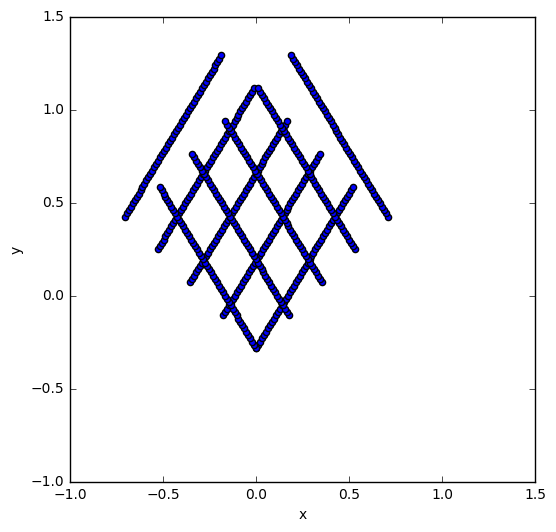

In [22]:
"""旋转"""
shape.dot(rotation).plot(x='x', y='y', figsize=[6,6], kind='scatter')
plt.xlim([-1,1.5])
plt.ylim([-1,1.5])
plt.show()

(-1, 1.5)

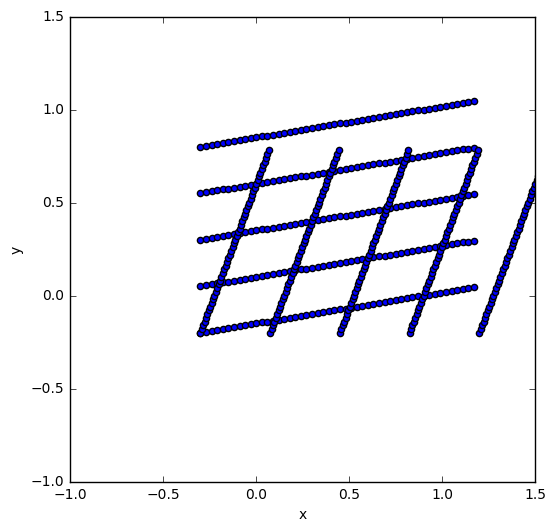

In [6]:
"""x拉伸"""
shape.dot(stretch_x).plot(x='x', y='y', figsize=[6,6], kind='scatter')
plt.xlim([-1,1.5])
plt.ylim([-1,1.5])


(-1, 1.5)

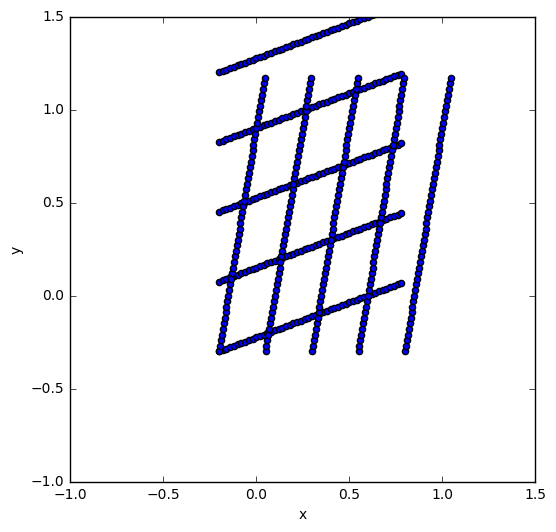

In [7]:
"""y拉伸"""
shape.dot(stretch_y).plot(x='x', y='y', figsize=[6,6], kind='scatter')
plt.xlim([-1,1.5])
plt.ylim([-1,1.5])


(-1, 1.5)

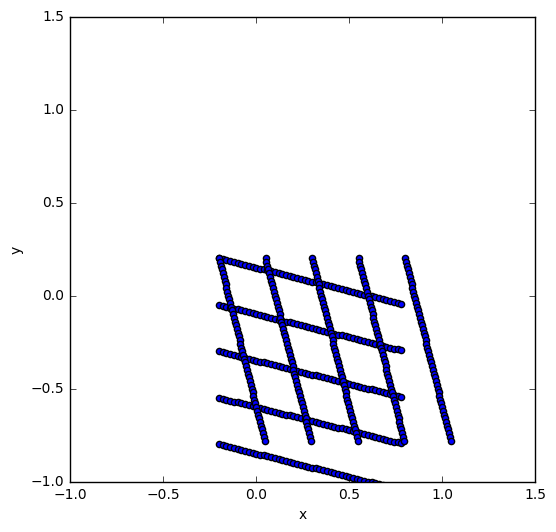

In [8]:
"""y反转"""
shape.dot(flip_y).plot(x='x', y='y', figsize=[6,6], kind='scatter')
plt.xlim([-1,1.5])
plt.ylim([-1,1.5])


## 斐波那契数列

In [9]:
"""利用纯粹递归计算斐波那契数列"""
def arrayComputer(n):
    if n <= 2:
        return 1
    else:
        prevA = arrayComputer(n-1)
        prevprevA = arrayComputer(n-2)
        return prevA + prevprevA

直接递归算法时间复杂度

In [13]:
print ("",)
for n in range(1,30):
    %time print ("第%2.d个斐波那契数为： %7.d, \所用时间为 "%(n,arrayComputer(n)),)


第 1个斐波那契数为：       1, \所用时间为 
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 18.1 µs
第 2个斐波那契数为：       1, \所用时间为 
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 15 µs
第 3个斐波那契数为：       2, \所用时间为 
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 15.7 µs
第 4个斐波那契数为：       3, \所用时间为 
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 17.9 µs
第 5个斐波那契数为：       5, \所用时间为 
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 17.2 µs
第 6个斐波那契数为：       8, \所用时间为 
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 16.9 µs
第 7个斐波那契数为：      13, \所用时间为 
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 18.4 µs
第 8个斐波那契数为：      21, \所用时间为 
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 19.8 µs
第 9个斐波那契数为：      34, \所用时间为 
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 24.6 µs
第10个斐波那契数为：      55, \所用时间为 
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 29.1 µs
第11个斐波那契数为：      89, \所用时间为 
CPU times: user 0 ns, sys: 0 ns, total: 0 

In [14]:
"""利用线性模型计算斐波那契数列"""
def linearComputer(n):
    if n <= 2:
        return 1    
    current2A = [1, 1]
    prev2A = copy.deepcopy(current2A)
    for ind in range(n-2):
        current2A[0] = 0*prev2A[0] + 1*prev2A[1]
        current2A[1] = 1*prev2A[0] + 1*prev2A[1]
        prev2A = copy.deepcopy(current2A)
    return prev2A[1]

线性模型算法时间复杂度

In [16]:
for n in range(1,300):
    %time print ("第%2.d个斐波那契数为： %7.d, \所用时间为 "%(n,linearComputer(n)),)

第 1个斐波那契数为：       1, \所用时间为 
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 53.4 µs
第 2个斐波那契数为：       1, \所用时间为 
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 24.1 µs
第 3个斐波那契数为：       2, \所用时间为 
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 60.6 µs
第 4个斐波那契数为：       3, \所用时间为 
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 53.6 µs
第 5个斐波那契数为：       5, \所用时间为 
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 62.2 µs
第 6个斐波那契数为：       8, \所用时间为 
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 67.9 µs
第 7个斐波那契数为：      13, \所用时间为 
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 73 µs
第 8个斐波那契数为：      21, \所用时间为 
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 79.2 µs
第 9个斐波那契数为：      34, \所用时间为 
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 86.8 µs
第10个斐波那契数为：      55, \所用时间为 
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 92.5 µs
第11个斐波那契数为：      89, \所用时间为 
CPU times: user 0 ns, sys: 0 ns, total: 0 n

## 线性回归

In [17]:
"""准备数据集X,Y"""
a=1
b=0.2
c=0.3
row_number = 100
ind = np.array(range(row_number))
X = np.array([[1,1,i] for i in range(row_number)])
X[:,1] = ind**2/row_number
X[:,2] = np.tan(ind)/row_number

Y = a*X[:,0] + b*X[:,1] + c*X[:,2] + np.random.rand(1,row_number)

Y_validate = a*X[:,0] + b*X[:,1] + c*X[:,2] + np.random.rand(1,row_number)


df = pd.DataFrame(X,columns=['x%d'%key_ind for key_ind in range(3)])
df['y'] = Y.T
df['y_validate'] = Y_validate.T

In [18]:
"""准备线性模型"""
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression(fit_intercept=False)

from sklearn.linear_model import Lasso
lasso_clf = Lasso(fit_intercept=False)

Linear regression coefficients:  [[ 1.51207603  0.19837741  0.06070806]]


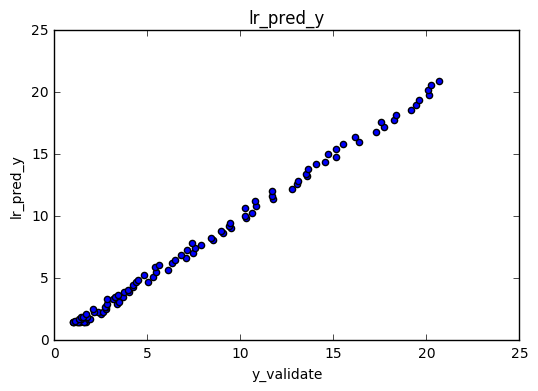

In [23]:
"""线性回归"""
lr_clf.fit(X,Y.T)
print ("Linear regression coefficients: ",lr_clf.coef_)

df['lr_pred_y'] = X.dot(lr_clf.coef_.T)

df.plot(y='lr_pred_y',x='y_validate',kind='scatter')
plt.title("lr_pred_y")
plt.show()

Lasso regression coefficients:  [ 0.          0.22334215 -0.        ]


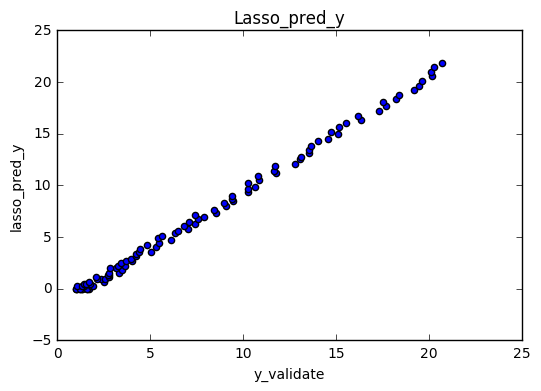

In [25]:
"""Lasso 线性回归"""
lasso_clf.fit(X,Y.T)
print ("Lasso regression coefficients: ",lasso_clf.coef_)

df['lasso_pred_y'] = X.dot(lasso_clf.coef_.T)

df.plot(y='lasso_pred_y',x='y_validate',kind='scatter')
plt.title("Lasso_pred_y")
plt.show()

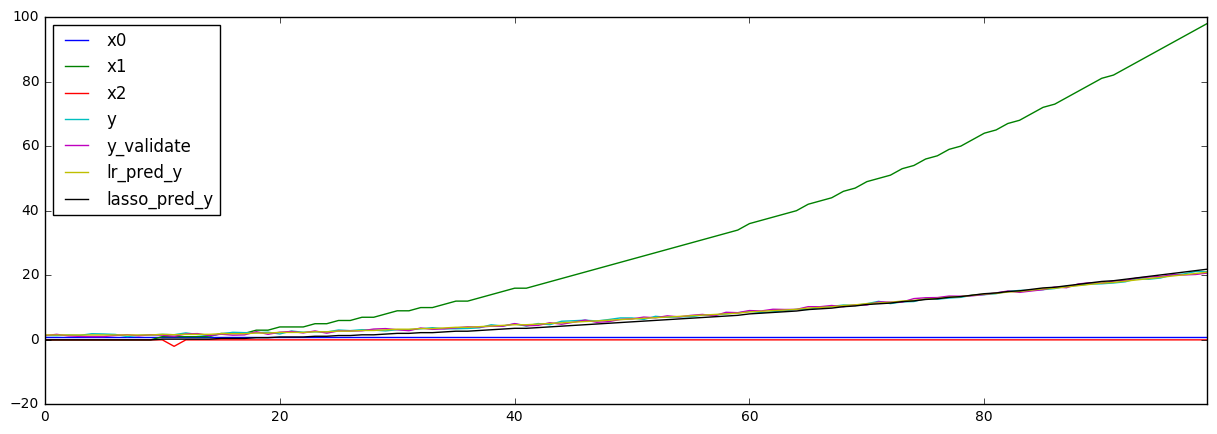

In [27]:
"""从图中看出 x_1 是最主要的变量 Lasso regression 成功帮助我们找到了这个变量"""
df.plot(figsize=[15,5])
plt.show()